<a href="https://colab.research.google.com/github/shrishtinigam/dyslexic-character-recognition/blob/main/Binary_Classification_Reversed%2C_Normal_Char_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building the dataset
### Getting the images from the drive folder
5500_dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"

 Books					   MNER.gdoc
 calibrate				  'Photogrammetry '
 character-bot				  'rrf-zqdw-vtb - Nov 7, 2022 (1).gjam'
'Colab Notebooks'			  'rrf-zqdw-vtb - Nov 7, 2022 (2).gjam'
 constraint_Hindi_Train.csv		  'rrf-zqdw-vtb - Nov 7, 2022.gjam'
 Constraint_Hindi_Valid.csv		  'sem 3'
 d4					   TrainDyslexic100
'DocScanner Mar 31, 2022 1-32 AM.pdf'	   TrainDyslexic20
'Document from Meher Shrishti Nigam.pdf'   TrainNormal100
 hindicorpus				   TrainNormal20
 img2					   TrainNormal20Old
 img3					   vocab.txt
'INTERVIEW PREP'


In [ ]:
import os
import glob
import string

In [ ]:
import cv2 as cv2
from google.colab.patches import cv2_imshow

## TARGET: Given a single image of a letter, the model is able to classify it as "Normal" or "Dyslexic".

In [ ]:
alphabets = []
for letter in string.ascii_uppercase:
  alphabets.append(letter)

In [ ]:
images = []
x = 0
for letter in alphabets:
  image_paths = glob.glob(f"/content/drive/My Drive/TrainNormal100/" + letter + "*.png")
  for i in image_paths:
    image = cv2.imread(i)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append([image, x])

In [ ]:
x = 1
image_paths_dyx = glob.glob(f"/content/drive/My Drive/TrainDyslexic100/*.png")
for i in image_paths_dyx:
  image = cv2.imread(i)
  # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  images.append([image, x])

In [ ]:
"""# SANITY CHECK
for i in range(len(images)):
  print(i, images[i][1])
  cv2_imshow(images[i][0])"""

'# SANITY CHECK\nfor i in range(len(images)):\n  print(i, images[i][1])\n  cv2_imshow(images[i][0])'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

## Building dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(images)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2728 non-null   object
 1   1       2728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.8+ KB


In [ ]:
df.shape

(2728, 2)

In [ ]:
df

,0,1
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
...,...,...
2723,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
2724,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
2725,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
2726,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1


In [ ]:
df.rename(columns = {0:'Character', 1:'Class'}, inplace = True)

In [ ]:
df.columns

Index(['Character', 'Class'], dtype='object')

In [ ]:
df = df.sample(frac=1)

In [ ]:
"""# SANITY CHECK
for i in range(len(images)):
  print(i, images[i][1])
  cv2_imshow(images[i][0])"""

'# SANITY CHECK\nfor i in range(len(images)):\n  print(i, images[i][1])\n  cv2_imshow(images[i][0])'

In [ ]:
def zeroPadTill(image, r, c):
  ri, ci, x = image.shape
  pad_rows = r-ri
  pad_cols = c-ci
  image = cv2.copyMakeBorder(image, pad_rows, 0, pad_cols, 0, cv2.BORDER_CONSTANT)
  return image

In [ ]:
data = []
for image in df['Character']:
  image = zeroPadTill(image, 32, 32)
  print(image.shape)
  data.append(image)
data = np.array(data)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

In [ ]:
for i in range(data.shape[0]):
  #print(data[i].shape)
  if(data[i].shape[0] != 32 or data[i].shape[1] != 32):
    print(i)

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
labels = df['Class'].to_numpy()

In [ ]:
#X=df['Character']
#Y=df['Class']
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state =42)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

In [ ]:
img_size = 32

In [ ]:
"""x_train.reshape(-1, img_size, img_size, 1)
x_test.reshape(-1, img_size, img_size, 1)"""

'x_train.reshape(-1, img_size, img_size, 1)\nx_test.reshape(-1, img_size, img_size, 1)'

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
"""y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')"""

"y_train = y_train.astype('float32')\ny_test = y_test.astype('float32')\nx_train = x_train.astype('float32')\nx_test = x_test.astype('float32')"

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(32,32,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)        

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train,y_train,epochs = 200 , validation_data = (x_test, y_test))

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


60/60 [==============================] - 3s 40ms/step - loss: 0.5704 - accuracy: 0.9356 - val_loss: 0.5877 - val_accuracy: 0.9658
Epoch 2/200
60/60 [==============================] - 2s 39ms/step - loss: 0.5522 - accuracy: 0.9450 - val_loss: 0.5675 - val_accuracy: 0.9658
Epoch 3/200
60/60 [==============================] - 2s 38ms/step - loss: 0.5301 - accuracy: 0.9508 - val_loss: 0.5474 - val_accuracy: 0.9658
Epoch 4/200
60/60 [==============================] - 2s 38ms/step - loss: 0.5155 - accuracy: 0.9518 - val_loss: 0.5275 - val_accuracy: 0.9658
Epoch 5/200
60/60 [==============================] - 2s 39ms/step - loss: 0.4947 - accuracy: 0.9550 - val_loss: 0.5079 - val_accuracy: 0.9658
Epoch 6/200
60/60 [==============================] - 2s 39ms/step - loss: 0.4759 - accuracy: 0.9550 - val_loss: 0.4888 - val_accuracy: 0.9658
Epoch 7/200
60/60 [==============================] - 2s 39ms/step - loss: 0.4622 - accuracy: 0.9555 - val_loss: 0.4696 - val_accuracy: 0.9658
Epoch 8/200
60/60 

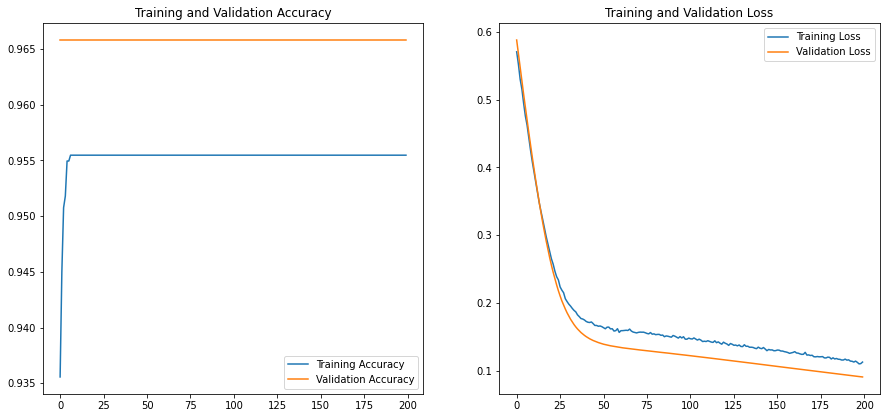

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predicts = model.predict(x_test)

26/26 [==============================] - 0s 11ms/step


In [ ]:
predicts_labels = []
for i in predicts:
  if(i[0] >= i[1]):
    predicts_labels.append(0)
  else:
    predicts_labels.append(1)
predicts_labels = np.array(predicts_labels)

In [ ]:
predicts_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
#print('Precision: %.3f' % precision_score(y_test,predicts_labels))
#print('Recall: %.3f' % recall_score(y_test, predicts_labels))
print('Accuracy: %.3f' % accuracy_score(y_test, predicts_labels))
#print('F1-Score: %.3f' % f1_score(y_test, predicts_labels))

Accuracy: 0.966


In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_predictions(y_test, predicts_labels)